# Libraries

In [149]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Relative Path
import os

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_absolute_error, mean_squared_error

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier

# Regressors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor

# Exporting Tree
from sklearn.tree import export_text, export_graphviz
import graphviz

# StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import Data

In [151]:
df = pd.read_csv("/Users/toan/Arbeit/Ironhack/Miniproject/week7/Week_7_Project_ML_for_German_Credit_Risk_Analysis/data/cleaned/df_final.csv")
df.head()

,age,sex,job,credit_amount,duration,risk,housing_own,housing_free,housing_rent,purpose_radio/tv,purpose_furniture/equipment,purpose_car,purpose_business,purpose_domestic_appliances,purpose_repairs,purpose_vacation/others,purpose_education
0,67,0,2,1169,6,1,1,0,0,1,0,0,0,0,0,0,0
1,22,1,2,5951,48,0,1,0,0,1,0,0,0,0,0,0,0
2,49,0,1,2096,12,1,1,0,0,0,0,0,0,0,0,0,1
3,45,0,2,7882,42,1,0,1,0,0,1,0,0,0,0,0,0
4,53,0,2,4870,24,0,0,1,0,0,0,1,0,0,0,0,0


In [152]:
# make copy
df_copy = df.copy()

In [153]:
df.shape

(1000, 17)

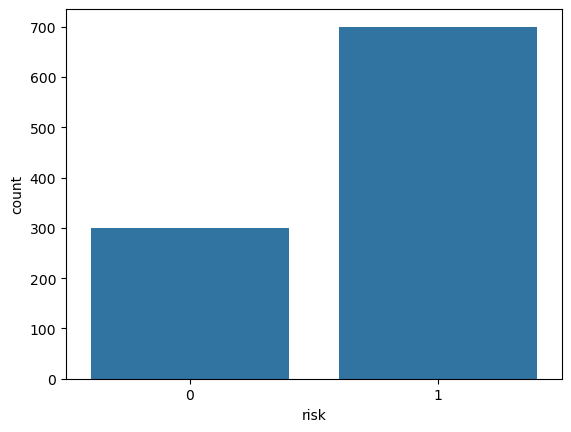

In [154]:
# Distribution of the target variable
sns.countplot(x='risk', data=df)
plt.show()

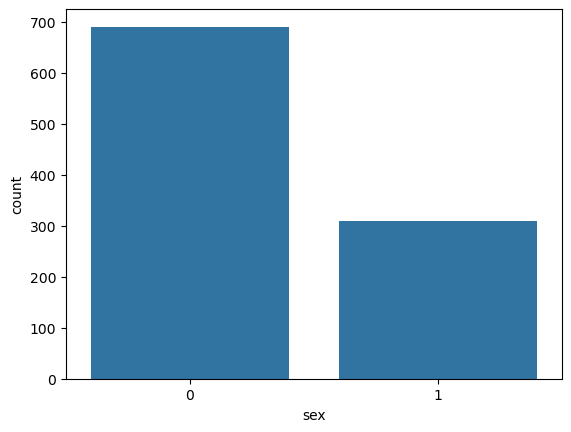

In [323]:
# Distribution of the feature variable
sns.countplot(x='sex', data=df)
plt.show()

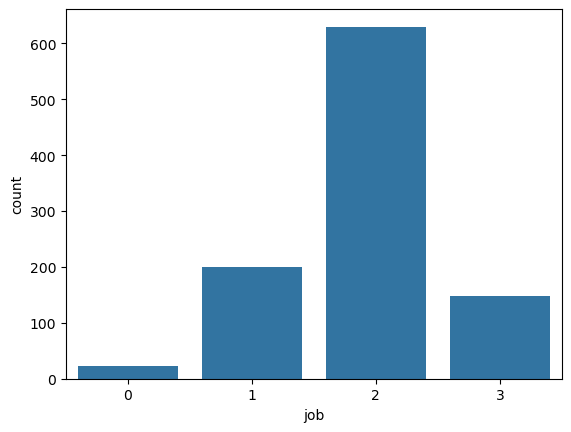

In [156]:
# Distribution of the target variable
sns.countplot(x='job', data=df)
plt.show()

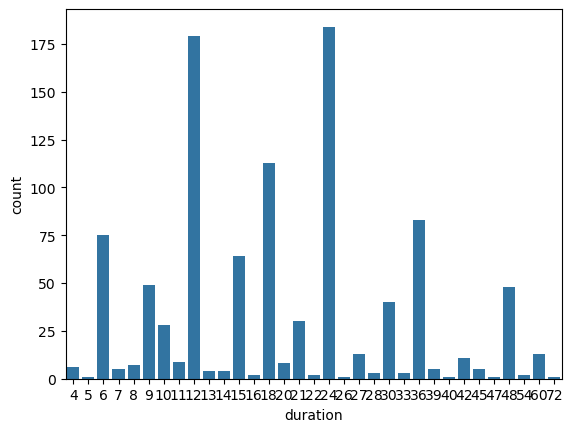

In [325]:
# Distribution of the target variable
sns.countplot(x='duration', data=df)
plt.show()

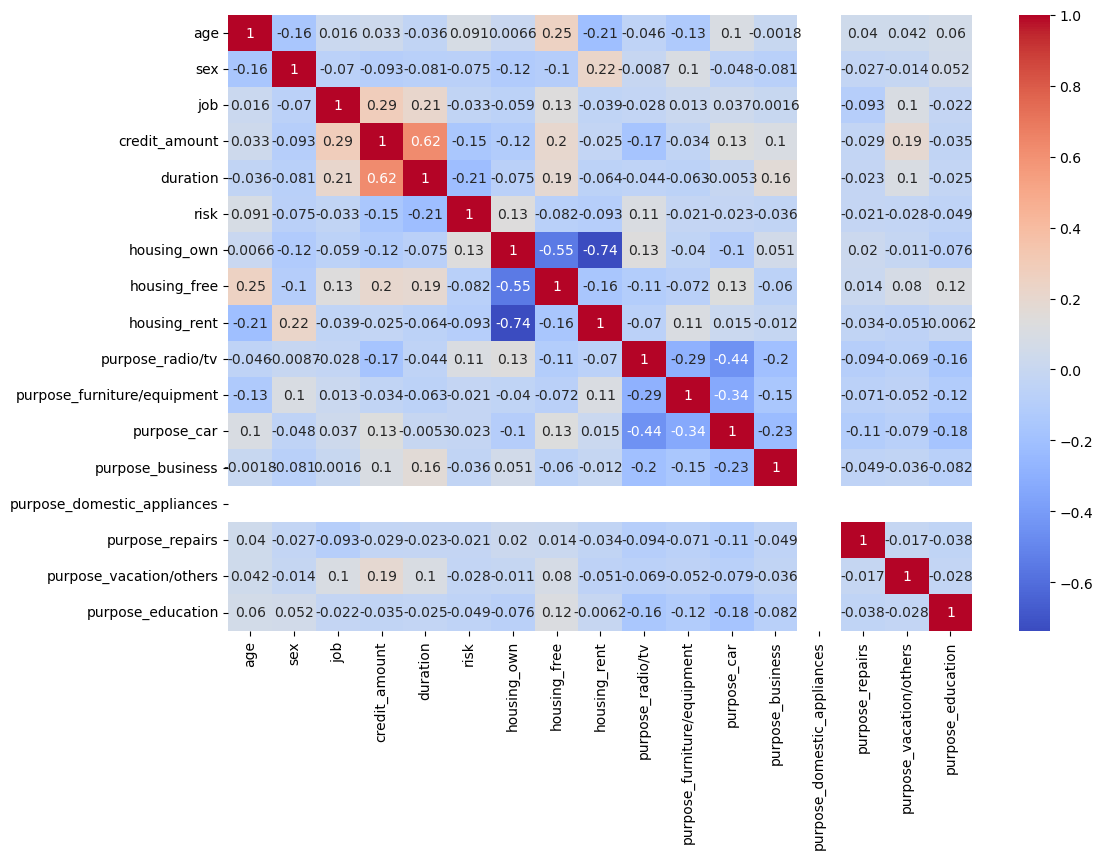

In [158]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Perform Train Test Split

In [160]:
features = df.drop(columns = ["risk"])
target = df["risk"]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [162]:
X_train.head()
X_train.shape

(800, 16)

**MinMaxScaler**

In [164]:
# 7.1 Import and fit normalizer 
normalizer = MinMaxScaler()

In [165]:
normalizer.fit(X_train)

MinMaxScaler()

In [166]:
# 7.2 Converting normalisation for numerical columns 
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [167]:
X_train_norm

array([[0.19642857, 0.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.14285714, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [0.08928571, 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.80357143, 0.        , 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.21428571, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.21428571, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [168]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns, index= X_train.index)
X_train_norm.head()
X_train_norm.shape

(800, 16)

In [169]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns, index= X_test.index)
X_test_norm.head()
X_test_norm.shape

(200, 16)

## Model Selection

**KNN Classifier**

In [172]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

In [173]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [174]:
knn_pred = knn.predict(X_test_norm)
knn_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [175]:
y_test.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1])

In [299]:
# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred, zero_division=1)
print(f"KNN Accuracy: {knn_accuracy:.2f}\n{knn_report}")

KNN Accuracy: 0.71
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        58
           1       0.71      1.00      0.83       142

    accuracy                           0.71       200
   macro avg       0.85      0.50      0.42       200
weighted avg       0.79      0.71      0.59       200



**Decision Tree Classifier**

In [178]:
# Initialize Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=10)

In [179]:
# Train Decision Tree Classifier
tree.fit(X_train_norm, y_train)

DecisionTreeClassifier(max_depth=10)

In [301]:
# Predict with Decision Tree Classifier
tree_pred = tree.predict(X_test_norm)

# Evaluate Decision Tree Classifier
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_report = classification_report(y_test, tree_pred, zero_division=1)
print(f"\nDecision Tree Accuracy: {tree_accuracy:.2f}\n{tree_report}")


Decision Tree Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.28      0.31      0.30        58
           1       0.71      0.68      0.69       142

    accuracy                           0.57       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.58      0.57      0.58       200



In [181]:
# Feature importance
tree_importance = {feature: importance for feature, importance in zip(features.columns, tree.feature_importances_)}
print(tree_importance)

{'age': 0.24725798395643706, 'sex': 0.024291742535602262, 'job': 0.054013176497597896, 'credit_amount': 0.3821061712046624, 'duration': 0.1407944325859076, 'housing_own': 0.022950227219673828, 'housing_free': 0.005398165007911613, 'housing_rent': 0.028914713869892132, 'purpose_radio/tv': 0.0267054674953688, 'purpose_furniture/equipment': 0.019581802171487844, 'purpose_car': 0.012305933325740554, 'purpose_business': 0.01486994527642319, 'purpose_domestic_appliances': 0.0, 'purpose_repairs': 0.009460371510589021, 'purpose_vacation/others': 0.0, 'purpose_education': 0.011349867342705672}


In [182]:
# Visualize the tree structure
tree_viz = export_text(tree, feature_names=list(features.columns))
print(tree_viz)

|--- duration <= 0.17
|   |--- credit_amount <= 0.20
|   |   |--- credit_amount <= 0.04
|   |   |   |--- duration <= 0.10
|   |   |   |   |--- age <= 0.27
|   |   |   |   |   |--- purpose_education <= 0.50
|   |   |   |   |   |   |--- age <= 0.15
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  0.15
|   |   |   |   |   |   |   |--- job <= 0.50
|   |   |   |   |   |   |   |   |--- credit_amount <= 0.02
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- credit_amount >  0.02
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- job >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- purpose_education >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  0.27
|   |   |   |   |   |--- class: 1
|   |   |   |--- duration >  0.10
|   |   |   |   |--- credit_amount <= 0.02
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- credit_amount >  0.02
|   | 

In [183]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [184]:
# Create a simpler tree for better visualization
simple_tree = DecisionTreeClassifier(max_depth=2, random_state=0)
simple_tree.fit(X_train_norm, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [185]:
'''
# Export the tree to a DOT file
dot_data = export_graphviz(simple_tree, out_file=None, 
                           filled=True, rounded=True, 
                           feature_names=features.columns, 
                           class_names=["bad", "good"])
'''

'\n# Export the tree to a DOT file\ndot_data = export_graphviz(simple_tree, out_file=None, \n                           filled=True, rounded=True, \n                           feature_names=features.columns, \n                           class_names=["bad", "good"])\n'

In [186]:
'''
# Visualize the tree using graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree") 
'''

'\n# Visualize the tree using graphviz\ngraph = graphviz.Source(dot_data)\ngraph.render("decision_tree") \n'

In [187]:
'''
# To display directly in a Jupyter notebook, use:
graph
'''

'\n# To display directly in a Jupyter notebook, use:\ngraph\n'

**Bagging and Pasting Classifier**

In [189]:
# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                                n_estimators=100,
                                max_samples=800)

In [190]:
# Train the model
bagging_clf.fit(X_train_norm, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=800, n_estimators=100)

In [303]:
# Predict on test data
bagging_pred = bagging_clf.predict(X_test_norm)

# Evaluate the model
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_report = classification_report(y_test, bagging_pred, zero_division=1)
print(f"\nBagging Classifier Accuracy: {bagging_accuracy:.2f}\n{bagging_report}")


Bagging Classifier Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.42      0.34      0.38        58
           1       0.75      0.80      0.78       142

    accuracy                           0.67       200
   macro avg       0.58      0.57      0.58       200
weighted avg       0.65      0.67      0.66       200



**Random Forest Classifier**

In [193]:
#Initialize a Random Forest
forest = RandomForestClassifier(n_estimators=100, max_depth=20)

In [194]:
#Training the model
forest.fit(X_train_norm, y_train)

RandomForestClassifier(max_depth=20)

In [195]:
forest_pred = forest.predict(X_test_norm)

In [305]:
#Evaluate the model
pred = forest.predict(X_test_norm)

# Evaluate the model
forest_accuracy = accuracy_score(y_test, forest_pred)
forest_report = classification_report(y_test, forest_pred, zero_division=1)
print(f"\nRandom Forest Classifier Accuracy: {forest_accuracy:.2f}\n{forest_report}")



Random Forest Classifier Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.42      0.24      0.31        58
           1       0.74      0.87      0.80       142

    accuracy                           0.69       200
   macro avg       0.58      0.55      0.55       200
weighted avg       0.65      0.69      0.65       200



**Gradient Boosting Classifier**

In [309]:
# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(max_depth=20, n_estimators=100)

In [311]:
# Train Gradient Boosting Classifier
gb_clf.fit(X_train_norm, y_train)

GradientBoostingClassifier(max_depth=20)

In [315]:
# Predict with Gradient Boosting Classifier
gb_pred = gb_clf.predict(X_test_norm)

# Evaluate Gradient Boosting Classifier
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_report = classification_report(y_test, gb_pred, zero_division=1)
print(f"\nGradient Boosting Classifier Accuracy: {gb_accuracy:.2f}\n{gb_report}")


Gradient Boosting Classifier Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.31      0.38      0.34        58
           1       0.72      0.65      0.68       142

    accuracy                           0.57       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.60      0.57      0.58       200



**Adaptive Boosting Classifier**

In [202]:
# Initialize AdaBoost Classifier
ada_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                             n_estimators=100)

In [203]:
# Train the model
ada_clf.fit(X_train_norm, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100)

In [317]:
# Predict on test data
ada_pred = ada_clf.predict(X_test_norm)

# Evaluate the model
ada_accuracy = accuracy_score(y_test, ada_pred)
ada_report = classification_report(y_test, ada_pred, zero_division=1)
print(f"\nAdaBoost Classifier Accuracy: {ada_accuracy:.2f}\n{ada_report}")


AdaBoost Classifier Accuracy: 0.57
              precision    recall  f1-score   support

           0       0.31      0.38      0.34        58
           1       0.72      0.65      0.68       142

    accuracy                           0.57       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.60      0.57      0.58       200



**Result**

In [321]:
print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, tree_pred):.2f}")
print(f"Bagging Accuracy: {accuracy_score(y_test, bagging_pred):.2f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.2f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, forest_pred):.2f}")
print(f"AdaBoost Accuracy: {accuracy_score(y_test, ada_pred):.2f}")

KNN Accuracy: 0.71
Decision Tree Accuracy: 0.57
Bagging Accuracy: 0.67
Gradient Boosting Accuracy: 0.57
Random Forest Accuracy: 0.69
AdaBoost Accuracy: 0.57


# Feature Engineering

## New Features

In [209]:
# Feature Engineering: Create new Feature
df['credit_per_duration'] = df['credit_amount'] / df['duration']

# Define features and target
features_new = df.drop(columns=["risk"])
target = df["risk"]

# Perform train-test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(features_new, target, test_size=0.20, random_state=0)

# Scale the data using MinMaxScaler
scaler_new = MinMaxScaler()
X_train_norm_new = scaler_new.fit_transform(X_train)
X_test_norm_new = scaler_new.transform(X_test)

**KNN Classifier**

In [328]:
# Initialize KNN classifier
knn_new = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn_new.fit(X_train_norm_new, y_train_new)

# Predict
knn_pred_new = knn_new.predict(X_test_norm_new)

knn_accuracy_new = accuracy_score(y_test_new, knn_pred_new)
knn_report_new = classification_report(y_test_new, knn_pred_new, zero_division=1)
print(f"KNN Accuracy with new feature: {knn_accuracy_new:.2f}\n{knn_report_new}")

KNN Accuracy with new feature: 0.60
              precision    recall  f1-score   support

           0       0.26      0.21      0.23        58
           1       0.70      0.76      0.73       142

    accuracy                           0.60       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.57      0.60      0.59       200



**Decision Tree Classifier**

In [330]:
# Initialize Decision Tree classifier
tree_new = DecisionTreeClassifier(max_depth=10)

# Train the model
tree_new.fit(X_train_norm_new, y_train_new)

# Predict
tree_pred_new = tree_new.predict(X_test_norm_new)

# Calculate accuracy
tree_accuracy_new = accuracy_score(y_test_new, tree_pred_new)
tree_report_new = classification_report(y_test_new, tree_pred_new, zero_division=1)
print(f"\nDecision Tree Accuracy with new feature: {tree_accuracy_new:.2f}\n{tree_report_new}")


Decision Tree Accuracy with new feature: 0.56
              precision    recall  f1-score   support

           0       0.27      0.29      0.28        58
           1       0.70      0.68      0.69       142

    accuracy                           0.56       200
   macro avg       0.49      0.48      0.48       200
weighted avg       0.58      0.56      0.57       200



**Bagging and Pasting Classifier**

In [332]:
# Initialize Bagging classifier with Decision Tree base estimator
bagging_clf_new = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20), n_estimators=100, max_samples=800)

# Train the model
bagging_clf_new.fit(X_train_norm_new, y_train_new)

# Predict
bagging_pred_new = bagging_clf_new.predict(X_test_norm_new)

# Calculate accuracy
bagging_accuracy_new = accuracy_score(y_test_new, bagging_pred_new)
bagging_report_new = classification_report(y_test_new, bagging_pred_new, zero_division=1)
print(f"\nBagging Accuracy with new feature: {bagging_accuracy_new:.2f}\n{bagging_report_new}")


Bagging Accuracy with new feature: 0.67
              precision    recall  f1-score   support

           0       0.38      0.26      0.31        58
           1       0.73      0.83      0.78       142

    accuracy                           0.67       200
   macro avg       0.56      0.54      0.54       200
weighted avg       0.63      0.67      0.64       200



**Gradient Boosting Classifier**

In [334]:
# Initialize Gradient Boosting classifier
gb_clf_new = GradientBoostingClassifier(max_depth=20, n_estimators=100)

# Train the model
gb_clf_new.fit(X_train_norm_new, y_train_new)

# Predict
gb_pred_new = gb_clf_new.predict(X_test_norm_new)

# Calculate accuracy
gb_accuracy_new = accuracy_score(y_test_new, gb_pred_new)
gb_report_new = classification_report(y_test_new, gb_pred_new, zero_division=1)
print(f"\nGradient Boosting Accuracy with new feature: {gb_accuracy_new:.2f}\n{gb_report_new}")


Gradient Boosting Accuracy with new feature: 0.58
              precision    recall  f1-score   support

           0       0.31      0.38      0.34        58
           1       0.72      0.66      0.69       142

    accuracy                           0.58       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.60      0.58      0.59       200



**Random Forest Classifier**

In [337]:
# Initialize Random Forest classifier
forest_new = RandomForestClassifier(n_estimators=100, max_depth=20)

# Train the model
forest_new.fit(X_train_norm_new, y_train_new)

# Predict
forest_pred_new = forest_new.predict(X_test_norm_new)

# Calculate accuracy
forest_accuracy_new = accuracy_score(y_test_new, forest_pred_new)
forest_report_new = classification_report(y_test_new, forest_pred_new, zero_division=1)
print(f"\nRandom Forest Accuracy with new feature: {forest_accuracy_new:.2f}\n{forest_report_new}")


Random Forest Accuracy with new feature: 0.68
              precision    recall  f1-score   support

           0       0.42      0.28      0.33        58
           1       0.74      0.85      0.79       142

    accuracy                           0.68       200
   macro avg       0.58      0.56      0.56       200
weighted avg       0.65      0.68      0.66       200



**Adaptive Boosting Classifier**

In [339]:
# Initialize AdaBoost classifier with Decision Tree base estimator
ada_clf_new = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20), n_estimators=100)

# Train the model
ada_clf_new.fit(X_train_norm_new, y_train_new)

# Predict
ada_pred_new = ada_clf_new.predict(X_test_norm_new)

# Calculate accuracy
ada_accuracy_new = accuracy_score(y_test_new, ada_pred_new)
ada_report_new = classification_report(y_test_new, ada_pred_new, zero_division=1)
print(f"\nAdaBoost Accuracy with new feature: {ada_accuracy_new:.2f}\n{ada_report_new}")


AdaBoost Accuracy with new feature: 0.57
              precision    recall  f1-score   support

           0       0.31      0.38      0.34        58
           1       0.72      0.65      0.68       142

    accuracy                           0.57       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.60      0.57      0.58       200



**Resultat with Feature Engineering**

In [341]:
print(f"KNN Accuracy with new feature: {accuracy_score(y_test_new, knn_pred_new):.2f}")
print(f"Decision Tree Accuracy with new feature: {accuracy_score(y_test_new, tree_pred_new):.2f}")
print(f"Bagging Accuracy with new feature: {accuracy_score(y_test_new, bagging_pred_new):.2f}")
print(f"Gradient Boosting Accuracy with new feature: {accuracy_score(y_test_new, gb_pred_new):.2f}")
print(f"Random Forest Accuracy with new feature: {accuracy_score(y_test_new, forest_pred_new):.2f}")
print(f"AdaBoost Accuracy with new feature: {accuracy_score(y_test_new, ada_pred_new):.2f}")

KNN Accuracy with new feature: 0.60
Decision Tree Accuracy with new feature: 0.56
Bagging Accuracy with new feature: 0.67
Gradient Boosting Accuracy with new feature: 0.58
Random Forest Accuracy with new feature: 0.68
AdaBoost Accuracy with new feature: 0.57


**Result without Feature Engineering**

In [343]:
print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, tree_pred):.2f}")
print(f"Bagging Accuracy: {accuracy_score(y_test, bagging_pred):.2f}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gb_pred):.2f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, forest_pred):.2f}")
print(f"AdaBoost Accuracy: {accuracy_score(y_test, ada_pred):.2f}")

KNN Accuracy: 0.71
Decision Tree Accuracy: 0.57
Bagging Accuracy: 0.67
Gradient Boosting Accuracy: 0.57
Random Forest Accuracy: 0.69
AdaBoost Accuracy: 0.57


# Hyperparameter Tuning

# Cross Validation

# Imbalanced

## Scaling y